## Mathematical Optimization Series

# Part 2: The basic gradient descent algorithm

In this post we describe the basic gradient descent algorithm.  While inherently very simple gradient descent - and its extensions - is one of the most popular mathematical optimization algorithms used in practice today.

In [3]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np
%matplotlib notebook

%load_ext autoreload
%autoreload 2

The new outline:
    
    1.  Go back to the fundamentals, use the notion of a first order approximation
    2.  If we do this, we have already seen the downward direction on a hyperplaen
    3.  It makes sense to use this as a unit step, so we normalize the direction
    4.  Steplength rules - here we can be a little more specific, that because this is much more structured than say random local search, we can in fact derive steplength values that will garuntee convergence to a 
    4.  The normalzied gradient descent algorithm
    5.  The formal perspective on 

#  1.  Gradient descent

In this Section we describe our first mathematical optimization algorithm - the basic gradient descent scheme.  

<IPython.core.display.Javascript object>


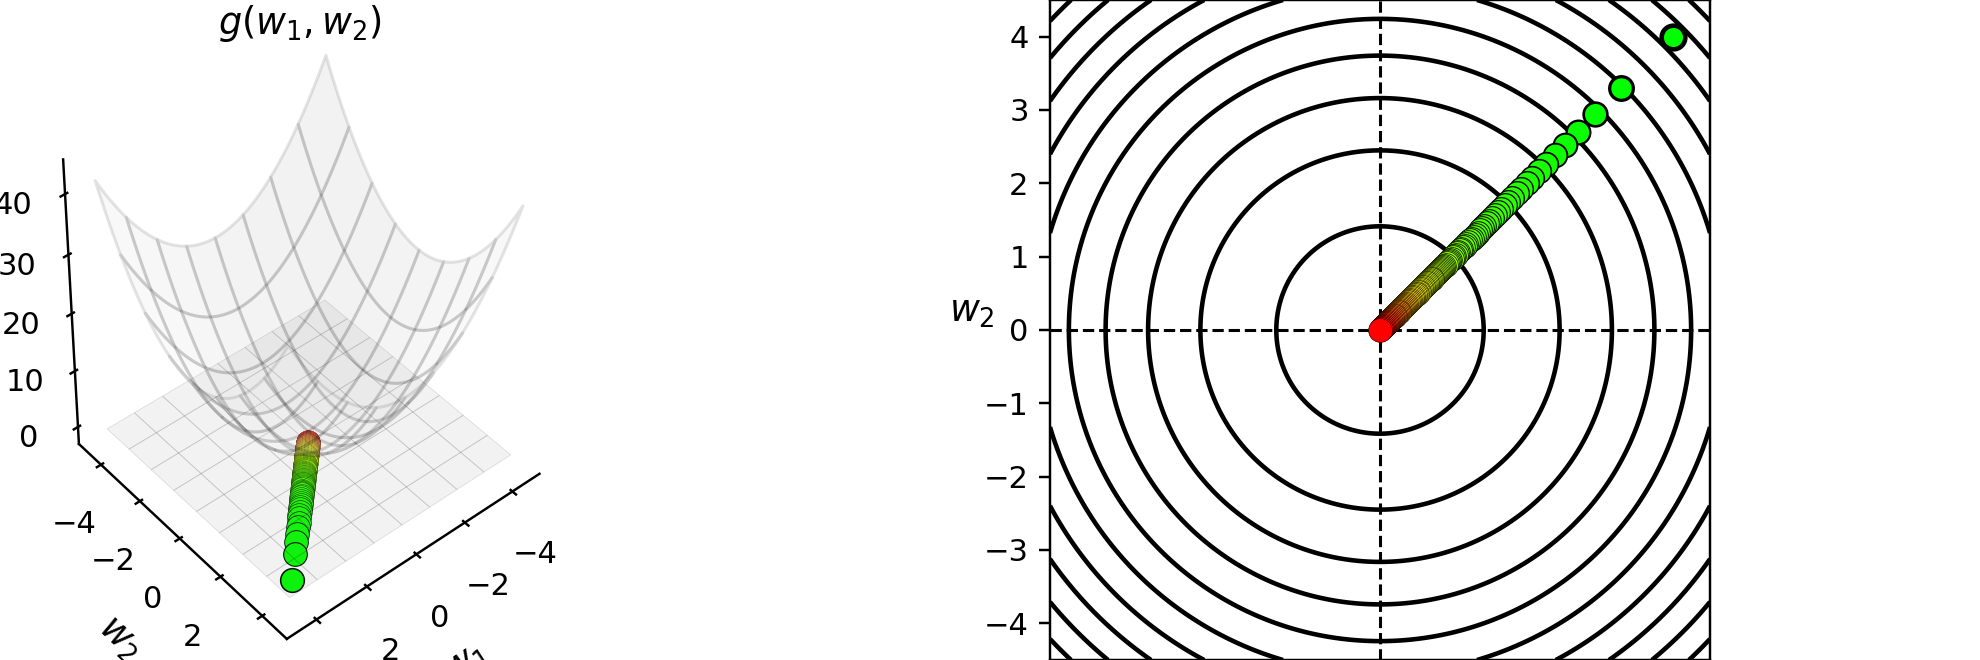

In [9]:
# define function, and points at which to take derivative
func = lambda w: np.dot(w.T,w) + 2
pt = [4,4]; num_samples = 1000; max_steps = 200; steplength = 'diminish';

# animate 2d slope visualizer
view = [40,50]
optlib.random_local_search.visualize3d(func=func,view = view,pt = pt,max_steps = max_steps, num_samples = num_samples,steplength = steplength,wmax=max(pt[0],pt[1]),axes = True)

## 1.1  The basic idea

In the previous post we described how - at a high level - all mathematical algorithms find the global minimum of a function by iteratively taking steps that decrease the value of a function as the algorithm runs.  However determining which direction to travel in order to decrease the value of a function - at least by examining the function directly - is no simple matter in general.  This is because a function that takes in $N$ inputs.

All of these algorithms share one common feature: because it is very difficult to determine which 

The defining characteristic distinguishing various mathematical optimization schemes is then the way these iterative steps are taken in reducing the value of $g$.

Gradient descent is an algorithm designed to do this by repeatedly employing the first order Taylor Series approximation of a function.  As described in our *Vital Elements of Calculus* series the first order Taylor Series approximation provides a local linear approximation (a tangent line or hyperplane) of a function centered about a given point.  

With gradient descent in short we repeatedly form this linear approximation  


As illustrated in Figure the basic idea with gradient descent is to build a linear model of the function $g$, determine the 'downward' direction on this hyperplane, travel a short distance along this direction, hop back on to the function $g$, and repeat until convergence. Starting at an initial point $\mathbf{w}^{0}$ and by carefully choosing how far we travel at each step, the gradient descent procedure produces a sequence of points $\mathbf{w}^{1},\,\mathbf{w}^{2},\,\mathbf{w}^{3}...$, that shrinks the value of $g$ at each step and eventually reaches a stationary point of $g$. 